In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les films et séries traduits en français
**Input**
- title.akas.tsv *renommé en* IMDb Data Files.tsv

**Opérations**

Filtrer pour garder les lignes avec :
- soit la colonne Region == 'FR'
- soit la colonne Langage contennant 'fr'

**Output**
- df_fr
- film_fr.csv

In [3]:
df = pd.read_csv('IMDb Data Files.tsv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447921 entries, 0 to 50447920
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  int64 
dtypes: int64(2), object(6)
memory usage: 3.0+ GB


In [4]:
region = df['region'] == 'FR'
langue = df['language'].str.contains('fr')
df = df[region | langue]
len(df)

5013444

In [5]:
df.to_csv('film_fr.csv')
df_fr = df

# Calculer une note pondérée
Nous prenons en compte le nombre de votes dans l'attribution de la note moyenne
Si le film a reçu moins de 50 avis, sa note moyenne sera dégradée

**Input**
- title.ratings.tsv *renommé en* IMDb Ratings.tsv

**Opérations**
- Pondération de la note moyenne en appliquant un ratio en fonction du nombre de votes
- Suppression des films avec une note moyenne pondérée inférieure à 5

**Output**
- df_notes
- notes.csv

### Paramètres

In [6]:
nb_minimum_avis = 52
note_minimum = 5

In [7]:
df = pd.read_csv('IMDb Ratings.tsv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501791 entries, 0 to 1501790
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1501791 non-null  object 
 1   averageRating  1501791 non-null  float64
 2   numVotes       1501791 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 34.4+ MB


In [11]:
def ponderation_note(row):
    return round(
        (
            (min(row['numVotes'], nb_minimum_avis) 
            / nb_minimum_avis
            )*0.5 
            + 0.5) 
        * row['averageRating'],
          2)


df['score'] = df.apply(ponderation_note, axis=1)

In [12]:
df['numVotes'].median()

26.0

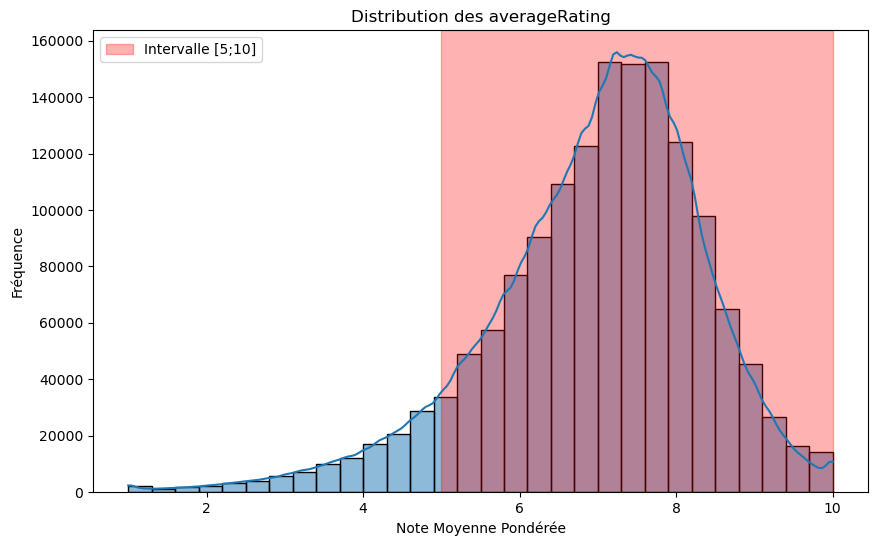

In [13]:
# Graphique de distribution des averageNotes
plt.figure(figsize=(10, 6))
sns.histplot(df['averageRating'], bins=30, kde=True)
plt.title('Distribution des averageRating')
plt.xlabel('Note Moyenne Pondérée')
plt.ylabel('Fréquence')

# Highlight sur l'intervalle [5;10]
plt.axvspan(5, 10, color='red', alpha=0.3, label='Intervalle [5;10]')

# Légende
plt.legend()

plt.show()

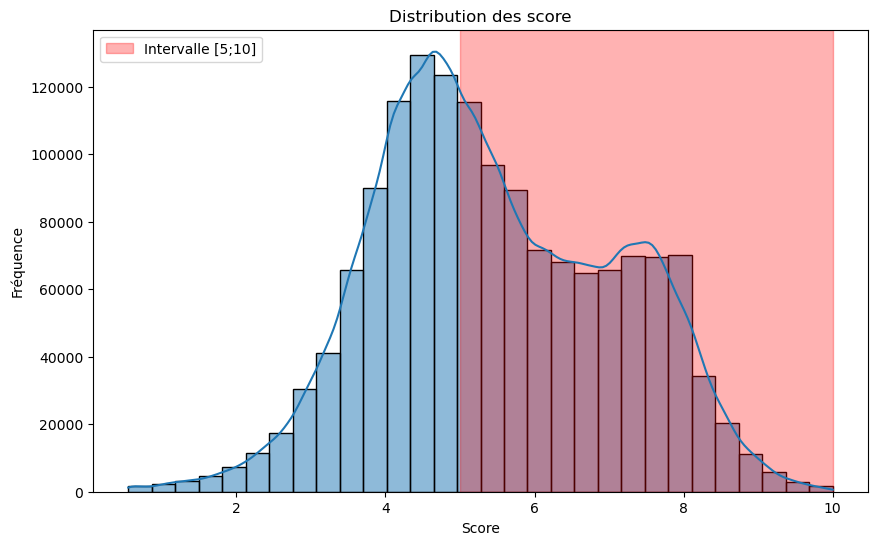

In [14]:
# Graphique de distribution des notes moyennes pondérées
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=30, kde=True)
plt.title('Distribution des score')
plt.xlabel('Score')
plt.ylabel('Fréquence')

# Highlight sur l'intervalle [5;10]
plt.axvspan(5, 10, color='red', alpha=0.3, label='Intervalle [5;10]')

# Légende
plt.legend()

plt.show()

### Comparaison entre filtre sur la note moyenne et la note moyenne pondérée

**Note moyenne -> 1 376 438 résultats**

In [15]:
filtre = df['averageRating'] >= note_minimum
df_note_moy = df[filtre]
len(df_note_moy)

1376438

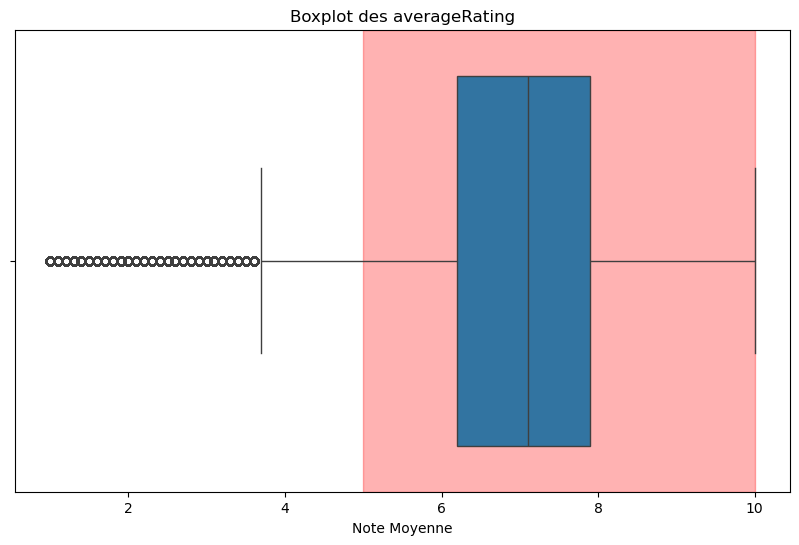

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['averageRating'])
plt.title('Boxplot des averageRating')
plt.xlabel('Note Moyenne')
# Highlight sur l'intervalle [5;10]
plt.axvspan(5, 10, color='red', alpha=0.3, label='Intervalle [5;10]')
plt.show()

**Note moyenne pondérée -> 858 364 résultats**

In [17]:
filtre = df['score'] >= note_minimum
df_note_ponderee = df[filtre]
len(df_note_ponderee)

842590

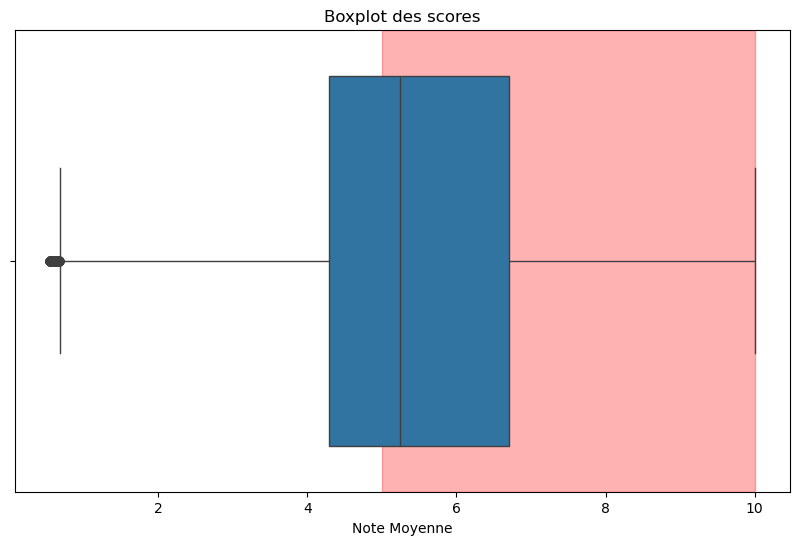

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['score'])
plt.title('Boxplot des scores')
plt.xlabel('Note Moyenne')
# Highlight sur l'intervalle [5;10]
plt.axvspan(5, 10, color='red', alpha=0.3, label='Intervalle [5;10]')
plt.show()

**Output**

In [19]:
df_notes = df_note_ponderee
df_notes.to_csv('notes.csv')

# Filtrer uniquement les films
**Input**
- title.basics.tsv *renommé en* IMDb Basics Data.tsv

**Opérations**

Filtrer pour garder les lignes avec :
- la colonne titleType == 'movie'
- la colonne isAdult == 0

**Output**

- df_films
- films.csv

In [20]:
df = pd.read_csv('IMDb Basics Data.tsv', sep='\t')
df.head()

/var/folders/l2/4bhymbh53d3_vrys9v8mb6hw0000gn/T/ipykernel_7717/3789358719.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IMDb Basics Data.tsv', sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [21]:
len(df)

11221518

**Filtrer uniquement les long-métrages**

In [22]:
filtre = df['titleType'] == 'movie'
df = df[filtre]
len(df)

696692

**Supprimer les films adultes**

In [23]:
filtre = df['isAdult'] == 0
df = df[filtre]
len(df)

685087

**Supprimer les films sur la télé-réalité**

In [24]:
filtre = df['genres'].str.contains('Reality-TV', case=False)
df = df[~filtre]
len(df)

684534

**Supprimer les films 'Game show'**

In [25]:
filtre = df['genres'].str.contains('Game-Show', case=False)
df = df[~filtre]
len(df)

684503

**Supprimer les films 'News'**

In [26]:
filtre = df['genres'].str.contains('News', case=False)
df = df[~filtre]
len(df)

683040

**Supprimer les films 'Talk-Show'**

In [27]:
filtre = df['genres'].str.contains('Talk-Show', case=False)
df = df[~filtre]
len(df)

682857

**Supprimer les films sans genre**

In [28]:
filtre = df['genres'].str.contains('\\\\N', case=False)
df = df[~filtre]
len(df)

607928

In [29]:
df_films = df
df_films.to_csv('films.csv')

# Splitter les genres en colonnes
**Input**
- df_films

**Opérations**

- Lister les genres
- Créer une colonne par genre
- Attribuer les valeurs en fonction des genres présents dans la colonne 'genres'
- drop la colonne 'genres'

**Output**

- df_films

**Récupérer la liste unique des genres**

In [30]:
liste_genre = list(df_films['genres'])
set_genres = set(liste_genre)
str_genres = ','.join(set_genres)
liste_genre_unique = list(set(str_genres.split(',')))
liste_genre_unique

['Romance',
 'War',
 'Crime',
 'Fantasy',
 'Thriller',
 'Comedy',
 'Music',
 'Drama',
 'Family',
 'Biography',
 'History',
 'Action',
 'Adventure',
 'Animation',
 'Horror',
 'Musical',
 'Sport',
 'Sci-Fi',
 'Film-Noir',
 'Western',
 'Documentary',
 'Mystery']

**Ajouter toutes les nouvelles colonnes**

In [31]:
for genre in liste_genre_unique:
    df_films[genre] = 0
    df_films[genre] = df_films[genre].astype(int)
df_films.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607928 entries, 8 to 11221468
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          607928 non-null  object
 1   titleType       607928 non-null  object
 2   primaryTitle    607926 non-null  object
 3   originalTitle   607926 non-null  object
 4   isAdult         607928 non-null  object
 5   startYear       607928 non-null  object
 6   endYear         607928 non-null  object
 7   runtimeMinutes  607928 non-null  object
 8   genres          607928 non-null  object
 9   Romance         607928 non-null  int64 
 10  War             607928 non-null  int64 
 11  Crime           607928 non-null  int64 
 12  Fantasy         607928 non-null  int64 
 13  Thriller        607928 non-null  int64 
 14  Comedy          607928 non-null  int64 
 15  Music           607928 non-null  int64 
 16  Drama           607928 non-null  int64 
 17  Family          607928 non-null 

**Remplir les colonnes avec les genres présents**

In [34]:
for genre in liste_genre_unique :
    filtre = df_films['genres'].str.contains(genre, case=False)
    df_films.loc[filtre, genre] = 1
df_films.head(1)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Romance,...,Adventure,Animation,Horror,Musical,Sport,Sci-Fi,Film-Noir,Western,Documentary,Mystery
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,1,...,0,0,0,0,0,0,0,0,0,0


# Fusionner les bases de données précédemment filtrées

**Input**
- df_films
- df_fr
- df_notes

Les films sélectionnées doivent remplir toutes les conditions proposées précedemment.

**Choix du filtre : inner**

**Output**
- df
- data_clean.csv

**Fusion df_film et df_fr**

In [35]:
df_temp = df_films.merge(
    df_fr,
    how = 'inner',
    left_on = 'tconst',
    right_on = 'titleId'
)
df_temp.drop(['ordering',
    'titleId',
    'types',
    'attributes',
    'isAdult',
    'titleType',
    'endYear',
    'primaryTitle'],
    axis=1,
    inplace = True)
df_temp.head(2)

,tconst,originalTitle,startYear,runtimeMinutes,genres,Romance,War,Crime,Fantasy,Thriller,...,Sport,Sci-Fi,Film-Noir,Western,Documentary,Mystery,title,region,language,isOriginalTitle
0,tt0000591,L'enfant prodigue,1907,90,Drama,0,0,0,0,0,...,0,0,0,0,0,0,L'enfant prodigue,FR,\N,0
1,tt0000886,Hamlet,1910,\N,Drama,0,0,0,0,0,...,0,0,0,0,0,0,Hamlet,FR,\N,0


**Fusion df_full et df_notes**

In [36]:
df_full = df_temp.merge(
    df_notes,
    how = 'inner',
    left_on = 'tconst',
    right_on = 'tconst'
)
df_full.head(2)


,tconst,originalTitle,startYear,runtimeMinutes,genres,Romance,War,Crime,Fantasy,Thriller,...,Documentary,Mystery,title,region,language,isOriginalTitle,averageRating,numVotes,note_moy_ponderee,score
0,tt0001285,The Life of Moses,1909,50,"Biography,Drama,Family",0,0,0,0,0,...,0,0,La Vie de Moïse,FR,\N,0,5.5,63,5.50,5.50
1,tt0001614,De fire djævle,1911,60,Drama,0,0,0,0,0,...,0,0,Les Quatre Diables,FR,\N,0,6.5,43,5.94,5.94


**Réorganiser les colonnes**

In [37]:
df_reordered = df_full.iloc[:, [0,1,27,2,3,32,33,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
df_reordered.head(2)

,tconst,originalTitle,title,startYear,runtimeMinutes,numVotes,note_moy_ponderee,genres,Romance,War,...,Adventure,Animation,Horror,Musical,Sport,Sci-Fi,Film-Noir,Western,Documentary,Mystery
0,tt0001285,The Life of Moses,La Vie de Moïse,1909,50,63,5.50,"Biography,Drama,Family",0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0001614,De fire djævle,Les Quatre Diables,1911,60,43,5.94,Drama,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_reordered.rename(
    {
        'tconst' : 'id_film',
        'originalTitle' : 'titre_original',
        'title' : 'titre_fr',
        'startYear' : 'annee_sortie',
        'runtimeMinutes' : 'duree',
        'numVotes_x' : 'nb_votes',
        'score' : 'score'
    }, axis = 1,
    inplace = True 
)
df_reordered.head(2)

/var/folders/l2/4bhymbh53d3_vrys9v8mb6hw0000gn/T/ipykernel_7717/3663271490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reordered.rename(


,id_film,titre_original,titre_fr,annee_sortie,duree,numVotes,score,genres,Romance,War,...,Adventure,Animation,Horror,Musical,Sport,Sci-Fi,Film-Noir,Western,Documentary,Mystery
0,tt0001285,The Life of Moses,La Vie de Moïse,1909,50,63,5.50,"Biography,Drama,Family",0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0001614,De fire djævle,Les Quatre Diables,1911,60,43,5.94,Drama,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df_reordered


In [ ]:
df.to_csv('data_clean.csv')

# Fusionner le data frame IMDB avec la base TMDB

**Input**
- df
- tmdb full.csv


**Choix du filtre : inner**

**Output**
- df_full
- data_full.csv

In [62]:
df_tmdb = pd.read_csv('tmdb full.csv')
df_tmdb.head(1)

/var/folders/l2/4bhymbh53d3_vrys9v8mb6hw0000gn/T/ipykernel_7717/1638905928.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmdb = pd.read_csv('tmdb full.csv')


,adult,backdrop_path,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_name,production_companies_country
0,False,/dvQj1GBZAZirz1skEEZyWH2ZqQP.jpg,0,['Comedy'],NaN,3924,tt0029927,en,Blondie,Blondie and Dagwood are about to celebrate the...,...,70,['en'],Released,The favorite comic strip of millions at last o...,Blondie,False,7.214,7,['Columbia Pictures'],['US']


In [63]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309572 entries, 0 to 309571
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   adult                         309572 non-null  bool   
 1   backdrop_path                 151760 non-null  object 
 2   budget                        309572 non-null  int64  
 3   genres                        309572 non-null  object 
 4   homepage                      44262 non-null   object 
 5   id                            309572 non-null  int64  
 6   imdb_id                       309572 non-null  object 
 7   original_language             309572 non-null  object 
 8   original_title                309572 non-null  object 
 9   overview                      282512 non-null  object 
 10  popularity                    309572 non-null  float64
 11  poster_path                   264159 non-null  object 
 12  production_countries          309572 non-nul

In [64]:
df_tmdb.drop([
    'adult',
    'genres',
    'homepage',
    'id',
    'original_title',
    'title',
    'video'],
    axis=1,
    inplace=True)

In [ ]:
df_full = df.merge(
    df_tmdb,
    how = 'inner',
    left_on = 'id_film',
    right_on = 'imdb_id')
print(f'taille df film : {len(df)}')
print(f'taille df inner : {len(df_full)}')


taille df film : 94869
taille df inner : 87984


In [77]:
doublon = df_full['id_film'].duplicated()
print(f'taille df : {len(df_full)}')
print(f'nombre de doublon : {len(df_full[doublon])}')
df_full.drop_duplicates(inplace=True)
print(f'taille df : {len(df_full)}')

taille df : 87984
nombre de doublon : 33880
taille df : 72985


In [80]:
df_full.to_csv('data_full.csv')